In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/clean_5.csv")


In [3]:
columns = df.columns

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten
from keras.layers import Convolution1D, Dense, Dropout, MaxPooling1D, LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from keras import callbacks
from keras.callbacks import CSVLogger
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
import numpy as np
np.random.seed(0)

In [5]:
#installs
!pip install netaddr
! pip install -q scikit-plot

     |████████████████████████████████| 1.9MB 15.5MB/s 


In [6]:
df.describe()

,Unnamed: 0,Source Port,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Fwd IAT Std,Fwd PSH Flags,Fwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Variance,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound,Label
count,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.081706e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06,1.099989e+06
mean,5.499940e+05,2.337240e+04,3.242215e+04,1.435508e+01,4.434837e+03,5.434833e+02,5.294610e+02,5.374942e+02,8.467994e+00,8.695751e-01,2.591255e+00,2.325762e+00,inf,inf,4.639771e+05,6.818930e+05,5.070181e+05,7.051739e+05,2.253659e-03,1.088292e+06,5.292232e+02,5.489096e+02,5.378940e+02,2.025655e+03,2.253659e-03,2.294868e-01,1.048192e-02,7.140071e-03,7.799333e+02,5.374942e+02,2.591255e+00,4.434837e+03,1.551205e+03,8.402169e+01,3.335477e+05,9.805844e-01,6.848466e+00
std,3.175396e+05,2.408571e+04,1.922508e+04,4.704234e+00,1.408998e+04,5.376521e+02,5.414041e+02,5.378691e+02,2.098807e+02,1.306210e+01,4.248552e+01,4.715279e+01,NaN,NaN,1.792111e+06,2.626325e+06,1.931165e+06,2.717344e+06,4.741922e-02,9.115502e+05,5.412169e+02,5.694085e+02,5.376595e+02,1.186832e+05,4.741922e-02,4.205030e-01,1.018433e-01,8.419678e-02,8.147459e+02,5.378691e+02,4.248552e+01,1.408998e+04,4.235909e+03,1.757561e+03,1.669627e+06,1.379808e-01,3.288334e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.051751e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.749970e+05,6.900000e+02,1.578100e+04,1.700000e+01,4.220000e+02,2.110000e+02,8.000000e+01,1.784615e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.702287e+03,3.960396e+04,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.298060e+04,8.000000e+01,2.110000e+02,2.110000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.895000e+02,1.784615e+02,0.000000e+00,4.220000e+02,-1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00
50%,5.499940e+05,1.427300e+04,3.249900e+04,1.700000e+01,8.800000e+02,3.930000e+02,3.720000e+02,3.750000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.830000e+08,2.000000e+06,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+06,3.720000e+02,3.930000e+02,3.750000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.422000e+02,3.750000e+02,0.000000e+00,8.800000e+02,-1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00,7.000000e+00
75%,8.249910e+05,4.686800e+04,4.915300e+04,1.700000e+01,2.944000e+03,6.750000e+02,6.610000e+02,6.610000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.813333e+08,2.000000e+06,4.800000e+01,3.190810e+01,4.800000e+01,4.472136e-01,0.000000e+00,2.000000e+06,6.600000e+02,7.060000e+02,6.630000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.930000e+02,6.610000e+02,0.000000e+00,2.944000e+03,-1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+01


In [7]:
import pandas as pd
def clean_dataset(df):
    columns = df.columns
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    
    return df[indices_to_keep].astype(np.float64)

In [8]:
scaler = StandardScaler()

In [9]:
import netaddr 
ips = df[' Destination IP'].unique()
l = len(ips)
print('strating loop, length is',l)
for i in range(l):
  df[' Destination IP'] = df[' Destination IP'].replace(ips[i], int(netaddr.IPAddress(ips[i])))
print('loop over')

strating loop, length is 446
loop over


In [10]:
df = clean_dataset(df)

df.head()

,Unnamed: 0,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Fwd IAT Std,Fwd PSH Flags,Fwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Variance,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound,Label
0,0.0,58445.0,3.232248e+09,4463.0,17.0,766.0,383.0,383.0,383.0,0.0,0.0,0.0,0.0,766000000.0,2000000.0,1.0,0.0,1.0,0.0,0.0,2000000.0,383.0,383.0,383.0,0.0,0.0,0.0,0.0,0.0,574.5,383.0,0.0,766.0,-1.0,-1.0,0.0,1.0,7.0
1,1.0,36908.0,3.232248e+09,9914.0,17.0,778.0,389.0,389.0,389.0,0.0,0.0,0.0,0.0,778000000.0,2000000.0,1.0,0.0,1.0,0.0,0.0,2000000.0,389.0,389.0,389.0,0.0,0.0,0.0,0.0,0.0,583.5,389.0,0.0,778.0,-1.0,-1.0,0.0,1.0,7.0
2,2.0,41727.0,3.232248e+09,32361.0,17.0,750.0,375.0,375.0,375.0,0.0,0.0,0.0,0.0,375000000.0,1000000.0,2.0,0.0,2.0,0.0,0.0,1000000.0,375.0,375.0,375.0,0.0,0.0,0.0,0.0,0.0,562.5,375.0,0.0,750.0,-1.0,-1.0,0.0,1.0,7.0
3,3.0,55447.0,3.232248e+09,5691.0,17.0,738.0,369.0,369.0,369.0,0.0,0.0,0.0,0.0,369000000.0,1000000.0,2.0,0.0,2.0,0.0,0.0,1000000.0,369.0,369.0,369.0,0.0,0.0,0.0,0.0,0.0,553.5,369.0,0.0,738.0,-1.0,-1.0,0.0,1.0,7.0
4,4.0,58794.0,3.232248e+09,56335.0,17.0,750.0,375.0,375.0,375.0,0.0,0.0,0.0,0.0,750000000.0,2000000.0,1.0,0.0,1.0,0.0,0.0,2000000.0,375.0,375.0,375.0,0.0,0.0,0.0,0.0,0.0,562.5,375.0,0.0,750.0,-1.0,-1.0,0.0,1.0,7.0


In [11]:
x=df.iloc[:,df.columns != 'Label']
y=df.iloc[:,-1]
print("x\n",x.info())
y = pd.DataFrame(y)
print('y\n',y.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064740 entries, 0 to 1099988
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Unnamed: 0                   1064740 non-null  float64
 1    Source Port                 1064740 non-null  float64
 2    Destination IP              1064740 non-null  float64
 3    Destination Port            1064740 non-null  float64
 4    Protocol                    1064740 non-null  float64
 5   Total Length of Fwd Packets  1064740 non-null  float64
 6    Fwd Packet Length Max       1064740 non-null  float64
 7    Fwd Packet Length Min       1064740 non-null  float64
 8    Fwd Packet Length Mean      1064740 non-null  float64
 9   Bwd Packet Length Max        1064740 non-null  float64
 10   Bwd Packet Length Min       1064740 non-null  float64
 11   Bwd Packet Length Mean      1064740 non-null  float64
 12   Bwd Packet Length Std       1064740 non-n

In [12]:
from sklearn import preprocessing

t = x.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(t)
normalized_df = pd.DataFrame(x_scaled)

In [13]:
normalized_df.columns=[column for column in columns if column != 'Label']

In [14]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(100,200))
cor = normalized_df.corr()
sn.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [15]:
#df=df.drop('Unnamed: 0.1',axis=1)
normalized_df=normalized_df.drop('Unnamed: 0', axis=1)
normalized_df.head()

,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Fwd IAT Std,Fwd PSH Flags,Fwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Variance,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound
0,0.891854,0.748631,0.068101,1.0,0.004352,0.107313,0.189604,0.143656,0.0,0.0,0.0,0.0,0.260190,0.50,1.017250e-08,0.0,1.525876e-08,0.0,0.0,0.50,0.260190,0.010090,0.095180,0.0,0.0,0.0,0.0,0.0,0.142705,0.143656,0.0,0.004352,0.0,0.0,0.0,1.0
1,0.563206,0.748631,0.151278,1.0,0.004420,0.108994,0.192574,0.145907,0.0,0.0,0.0,0.0,0.264266,0.50,1.017250e-08,0.0,1.525876e-08,0.0,0.0,0.50,0.264266,0.010248,0.096671,0.0,0.0,0.0,0.0,0.0,0.144941,0.145907,0.0,0.004420,0.0,0.0,0.0,1.0
2,0.636742,0.748631,0.493797,1.0,0.004261,0.105071,0.185644,0.140656,0.0,0.0,0.0,0.0,0.127378,0.25,2.543126e-08,0.0,3.051751e-08,0.0,0.0,0.25,0.254755,0.009879,0.093192,0.0,0.0,0.0,0.0,0.0,0.139725,0.140656,0.0,0.004261,0.0,0.0,0.0,1.0
3,0.846106,0.748631,0.086839,1.0,0.004193,0.103390,0.182673,0.138405,0.0,0.0,0.0,0.0,0.125340,0.25,2.543126e-08,0.0,3.051751e-08,0.0,0.0,0.25,0.250679,0.009721,0.091701,0.0,0.0,0.0,0.0,0.0,0.137489,0.138405,0.0,0.004193,0.0,0.0,0.0,1.0
4,0.897180,0.748631,0.859617,1.0,0.004261,0.105071,0.185644,0.140656,0.0,0.0,0.0,0.0,0.254755,0.50,1.017250e-08,0.0,1.525876e-08,0.0,0.0,0.50,0.254755,0.009879,0.093192,0.0,0.0,0.0,0.0,0.0,0.139725,0.140656,0.0,0.004261,0.0,0.0,0.0,1.0


In [16]:
y=pd.DataFrame(y)
y.head()

,Label
0,7.0
1,7.0
2,7.0
3,7.0
4,7.0


In [17]:
normalized_df.describe()

,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Fwd IAT Std,Fwd PSH Flags,Fwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Variance,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound
count,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06
mean,3.537913e-01,7.403985e-01,4.946181e-01,8.504420e-01,2.588101e-02,1.535934e-01,2.642041e-01,2.032902e-01,2.304619e-04,6.153171e-04,5.342263e-04,3.410540e-04,2.414771e-01,2.812218e-01,7.314088e-03,1.045686e-02,7.992586e-03,1.081387e-02,2.226835e-03,2.810802e-01,3.623958e-01,1.458853e-02,1.347935e-01,4.779205e-05,2.226835e-03,2.199316e-01,1.070966e-02,7.369874e-03,1.951931e-01,2.032902e-01,5.342263e-04,2.588101e-02,2.292212e-02,1.340277e-03,6.016732e-03,9.800703e-01
std,3.674728e-01,7.297634e-02,2.935051e-01,2.729781e-01,8.127343e-02,1.502873e-01,2.675133e-01,2.012882e-01,5.619620e-03,9.092866e-03,8.617018e-03,6.802608e-03,3.320620e-01,2.259683e-01,2.776349e-02,3.958000e-02,2.991677e-02,4.095175e-02,4.713680e-02,2.260979e-01,3.669736e-01,1.499419e-02,1.333099e-01,2.755448e-03,4.713680e-02,4.142003e-01,1.029319e-01,8.553108e-02,2.020507e-01,2.012882e-01,8.617018e-03,8.127343e-02,6.500212e-02,2.725749e-02,2.961167e-02,1.397590e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.042239e-02,7.486311e-01,2.405127e-01,1.000000e+00,2.409091e-03,5.940039e-02,7.524752e-02,7.914220e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.279760e-06,9.345787e-03,1.017250e-08,0.000000e+00,1.525876e-08,0.000000e+00,0.000000e+00,6.575676e-03,1.032609e-01,5.584826e-03,5.243610e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.861833e-02,7.914220e-02,0.000000e+00,2.409091e-03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,2.003601e-01,7.486311e-01,4.958419e-01,1.000000e+00,5.068182e-03,1.101149e-01,1.856436e-01,1.436562e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100543e-01,2.500000e-01,2.543126e-08,0.000000e+00,1.525876e-08,0.000000e+00,0.000000e+00,2.500000e-01,2.547554e-01,1.035300e-02,9.518022e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.098709e-01,1.436562e-01,0.000000e+00,5.068182e-03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,7.121406e-01,7.486311e-01,7.500572e-01,1.000000e+00,1.672727e-02,1.913701e-01,3.351485e-01,2.539302e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.288043e-01,5.000000e-01,7.425928e-07,6.988002e-07,7.324203e-07,2.102517e-07,0.000000e+00,5.000000e-01,4.585598e-01,1.912540e-02,1.684914e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.526219e-01,2.539302e-01,0.000000e+00,1.672727e-02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e

In [18]:
normalized_x=normalized_df.iloc[:,normalized_df.columns != 'Label']

In [19]:
normalized_x.describe()

,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Fwd IAT Std,Fwd PSH Flags,Fwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Variance,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound
count,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06
mean,3.537913e-01,7.403985e-01,4.946181e-01,8.504420e-01,2.588101e-02,1.535934e-01,2.642041e-01,2.032902e-01,2.304619e-04,6.153171e-04,5.342263e-04,3.410540e-04,2.414771e-01,2.812218e-01,7.314088e-03,1.045686e-02,7.992586e-03,1.081387e-02,2.226835e-03,2.810802e-01,3.623958e-01,1.458853e-02,1.347935e-01,4.779205e-05,2.226835e-03,2.199316e-01,1.070966e-02,7.369874e-03,1.951931e-01,2.032902e-01,5.342263e-04,2.588101e-02,2.292212e-02,1.340277e-03,6.016732e-03,9.800703e-01
std,3.674728e-01,7.297634e-02,2.935051e-01,2.729781e-01,8.127343e-02,1.502873e-01,2.675133e-01,2.012882e-01,5.619620e-03,9.092866e-03,8.617018e-03,6.802608e-03,3.320620e-01,2.259683e-01,2.776349e-02,3.958000e-02,2.991677e-02,4.095175e-02,4.713680e-02,2.260979e-01,3.669736e-01,1.499419e-02,1.333099e-01,2.755448e-03,4.713680e-02,4.142003e-01,1.029319e-01,8.553108e-02,2.020507e-01,2.012882e-01,8.617018e-03,8.127343e-02,6.500212e-02,2.725749e-02,2.961167e-02,1.397590e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.042239e-02,7.486311e-01,2.405127e-01,1.000000e+00,2.409091e-03,5.940039e-02,7.524752e-02,7.914220e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.279760e-06,9.345787e-03,1.017250e-08,0.000000e+00,1.525876e-08,0.000000e+00,0.000000e+00,6.575676e-03,1.032609e-01,5.584826e-03,5.243610e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.861833e-02,7.914220e-02,0.000000e+00,2.409091e-03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,2.003601e-01,7.486311e-01,4.958419e-01,1.000000e+00,5.068182e-03,1.101149e-01,1.856436e-01,1.436562e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100543e-01,2.500000e-01,2.543126e-08,0.000000e+00,1.525876e-08,0.000000e+00,0.000000e+00,2.500000e-01,2.547554e-01,1.035300e-02,9.518022e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.098709e-01,1.436562e-01,0.000000e+00,5.068182e-03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,7.121406e-01,7.486311e-01,7.500572e-01,1.000000e+00,1.672727e-02,1.913701e-01,3.351485e-01,2.539302e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.288043e-01,5.000000e-01,7.425928e-07,6.988002e-07,7.324203e-07,2.102517e-07,0.000000e+00,5.000000e-01,4.585598e-01,1.912540e-02,1.684914e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.526219e-01,2.539302e-01,0.000000e+00,1.672727e-02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e

In [20]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.25, random_state=0)
y_train = np.array(y_train)

In [21]:
normalized_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064740 entries, 0 to 1064739
Data columns (total 36 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0    Source Port                 1064740 non-null  float64
 1    Destination IP              1064740 non-null  float64
 2    Destination Port            1064740 non-null  float64
 3    Protocol                    1064740 non-null  float64
 4   Total Length of Fwd Packets  1064740 non-null  float64
 5    Fwd Packet Length Max       1064740 non-null  float64
 6    Fwd Packet Length Min       1064740 non-null  float64
 7    Fwd Packet Length Mean      1064740 non-null  float64
 8   Bwd Packet Length Max        1064740 non-null  float64
 9    Bwd Packet Length Min       1064740 non-null  float64
 10   Bwd Packet Length Mean      1064740 non-null  float64
 11   Bwd Packet Length Std       1064740 non-null  float64
 12  Flow Bytes/s                 1064740 non-n

In [22]:
normalized_df.describe()

,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Fwd IAT Mean,Fwd IAT Std,Fwd PSH Flags,Fwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Variance,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound
count,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06,1.064740e+06
mean,3.537913e-01,7.403985e-01,4.946181e-01,8.504420e-01,2.588101e-02,1.535934e-01,2.642041e-01,2.032902e-01,2.304619e-04,6.153171e-04,5.342263e-04,3.410540e-04,2.414771e-01,2.812218e-01,7.314088e-03,1.045686e-02,7.992586e-03,1.081387e-02,2.226835e-03,2.810802e-01,3.623958e-01,1.458853e-02,1.347935e-01,4.779205e-05,2.226835e-03,2.199316e-01,1.070966e-02,7.369874e-03,1.951931e-01,2.032902e-01,5.342263e-04,2.588101e-02,2.292212e-02,1.340277e-03,6.016732e-03,9.800703e-01
std,3.674728e-01,7.297634e-02,2.935051e-01,2.729781e-01,8.127343e-02,1.502873e-01,2.675133e-01,2.012882e-01,5.619620e-03,9.092866e-03,8.617018e-03,6.802608e-03,3.320620e-01,2.259683e-01,2.776349e-02,3.958000e-02,2.991677e-02,4.095175e-02,4.713680e-02,2.260979e-01,3.669736e-01,1.499419e-02,1.333099e-01,2.755448e-03,4.713680e-02,4.142003e-01,1.029319e-01,8.553108e-02,2.020507e-01,2.012882e-01,8.617018e-03,8.127343e-02,6.500212e-02,2.725749e-02,2.961167e-02,1.397590e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.042239e-02,7.486311e-01,2.405127e-01,1.000000e+00,2.409091e-03,5.940039e-02,7.524752e-02,7.914220e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.279760e-06,9.345787e-03,1.017250e-08,0.000000e+00,1.525876e-08,0.000000e+00,0.000000e+00,6.575676e-03,1.032609e-01,5.584826e-03,5.243610e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.861833e-02,7.914220e-02,0.000000e+00,2.409091e-03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,2.003601e-01,7.486311e-01,4.958419e-01,1.000000e+00,5.068182e-03,1.101149e-01,1.856436e-01,1.436562e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100543e-01,2.500000e-01,2.543126e-08,0.000000e+00,1.525876e-08,0.000000e+00,0.000000e+00,2.500000e-01,2.547554e-01,1.035300e-02,9.518022e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.098709e-01,1.436562e-01,0.000000e+00,5.068182e-03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,7.121406e-01,7.486311e-01,7.500572e-01,1.000000e+00,1.672727e-02,1.913701e-01,3.351485e-01,2.539302e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.288043e-01,5.000000e-01,7.425928e-07,6.988002e-07,7.324203e-07,2.102517e-07,0.000000e+00,5.000000e-01,4.585598e-01,1.912540e-02,1.684914e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.526219e-01,2.539302e-01,0.000000e+00,1.672727e-02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e

In [23]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064740 entries, 0 to 1099988
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Label   1064740 non-null  float64
dtypes: float64(1)
memory usage: 16.2 MB


In [24]:
from sklearn import metrics
import scikitplot as skplt

from sklearn.metrics import f1_score

In [25]:
#we  need to plot confusion matrices a couple of times
def plot_confusion_matrix(y_test, y_pred):
  skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred,
    figsize=(12,12))




In [99]:
#metrics for our models
def display_metrics(algorithm_n,y_test,y_pred ):
  print("\n ", algorithm_n)
  print('Accuracy = ', metrics.accuracy_score(y_test, y_pred)*100)

  print("Recall =", metrics.recall_score(y_test, y_pred, labels=None, 
                                              pos_label=1, average='weighted', 
                                              sample_weight=None))

  print("Classification Report =\n", metrics.classification_report(y_test, y_pred, 
                                                                  labels=None, 
                                                                  target_names=None, 
                                                                  sample_weight=None, 
                                                                  digits=2, 
                                                                  output_dict=False))

  print("F1 Score = ",f1_score(y_test, y_pred, average='macro'))



In [65]:
#stochastic gradient descent
from  sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn import metrics
lr = SGDClassifier(loss="log", penalty="l2", max_iter=200)
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=200,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [66]:
y_pred = lr.predict(X_test)
print("Stochastic Gradient Descent\nAccuracy =", metrics.accuracy_score(y_test, y_pred)*100)

Stochastic Gradient Descent
Accuracy = 49.00088284463813


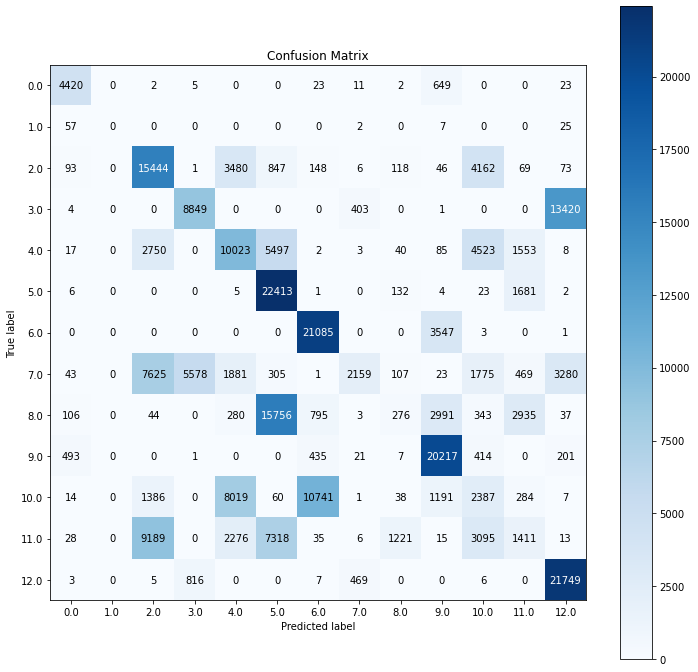

In [72]:

plot_confusion_matrix(y_test, y_pred)



In [74]:
display_metrics('Stochastic gradient descent',y_test,y_pred )

Stochastic Gradient Descent
Accuracy =  49.00088284463813


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report =
               precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      5135
         1.0       0.00      0.00      0.00        91
         2.0       0.42      0.63      0.51     24487
         3.0       0.58      0.39      0.47     22677
         4.0       0.39      0.41      0.40     24501
         5.0       0.43      0.92      0.59     24267
         6.0       0.63      0.86      0.73     24636
         7.0       0.70      0.09      0.16     23246
         8.0       0.14      0.01      0.02     23566
         9.0       0.70      0.93      0.80     21789
        10.0       0.14      0.10      0.12     24128
        11.0       0.17      0.06      0.09     24607
        12.0       0.56      0.94      0.70     23055

    accuracy                           0.49    266185
   macro avg       0.44      0.48      0.42    266185
weighted avg       0.45      0.49      0.42    266185

F1 Score =  0.417237387607015


KNN Classifier

In [77]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=8)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [78]:
y_pred = model.predict(X_test)
print("Accuracy =", metrics.accuracy_score(y_test, y_pred))

Accuracy = 0.6765745628040648


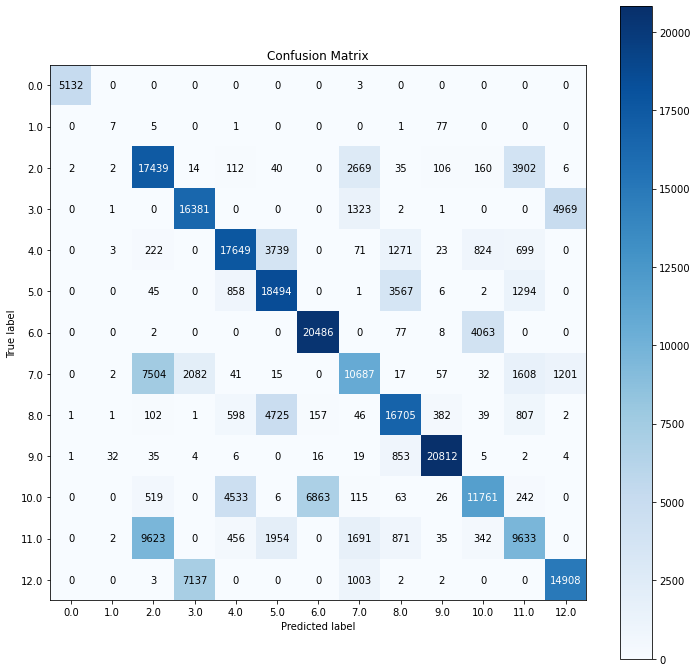

In [79]:

plot_confusion_matrix(y_test, y_pred)


In [80]:
display_metrics('K nearest Neighbour',y_test,y_pred )

K Nearest Neighbour Classifier
Accuracy =  67.65745628040648
Recall = 0.6765745628040648
Classification Report =
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5135
         1.0       0.14      0.08      0.10        91
         2.0       0.49      0.71      0.58     24487
         3.0       0.64      0.72      0.68     22677
         4.0       0.73      0.72      0.72     24501
         5.0       0.64      0.76      0.69     24267
         6.0       0.74      0.83      0.79     24636
         7.0       0.61      0.46      0.52     23246
         8.0       0.71      0.71      0.71     23566
         9.0       0.97      0.96      0.96     21789
        10.0       0.68      0.49      0.57     24128
        11.0       0.53      0.39      0.45     24607
        12.0       0.71      0.65      0.68     23055

    accuracy                           0.68    266185
   macro avg       0.66      0.65      0.65    266185
weighted avg       0

In [81]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [82]:
y_pred = model.predict(X_test)
print("Accuracy =", metrics.accuracy_score(y_test, y_pred))

Accuracy = 0.39414317110280445


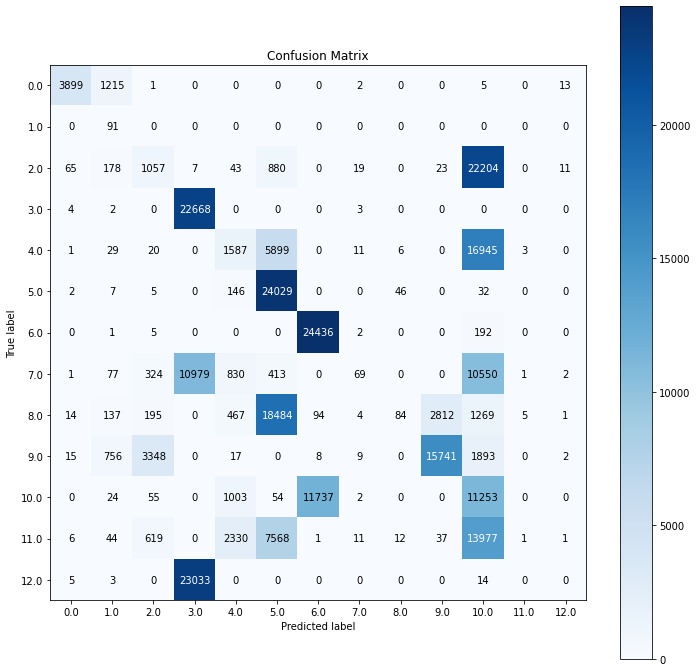

In [83]:

plot_confusion_matrix(y_test, y_pred)


In [84]:
display_metrics('Naive bayes',y_test,y_pred )

Naive Bayes
Accuracy =  39.41431711028044
Recall = 0.39414317110280445
Classification Report =
               precision    recall  f1-score   support

         0.0       0.97      0.76      0.85      5135
         1.0       0.04      1.00      0.07        91
         2.0       0.19      0.04      0.07     24487
         3.0       0.40      1.00      0.57     22677
         4.0       0.25      0.06      0.10     24501
         5.0       0.42      0.99      0.59     24267
         6.0       0.67      0.99      0.80     24636
         7.0       0.52      0.00      0.01     23246
         8.0       0.57      0.00      0.01     23566
         9.0       0.85      0.72      0.78     21789
        10.0       0.14      0.47      0.22     24128
        11.0       0.10      0.00      0.00     24607
        12.0       0.00      0.00      0.00     23055

    accuracy                           0.39    266185
   macro avg       0.39      0.46      0.31    266185
weighted avg       0.38      0.39     

XGBoost

In [85]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)



/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [87]:

print("Accuracy =", metrics.accuracy_score(y_test, y_pred))

Accuracy = 0.7214305839923362


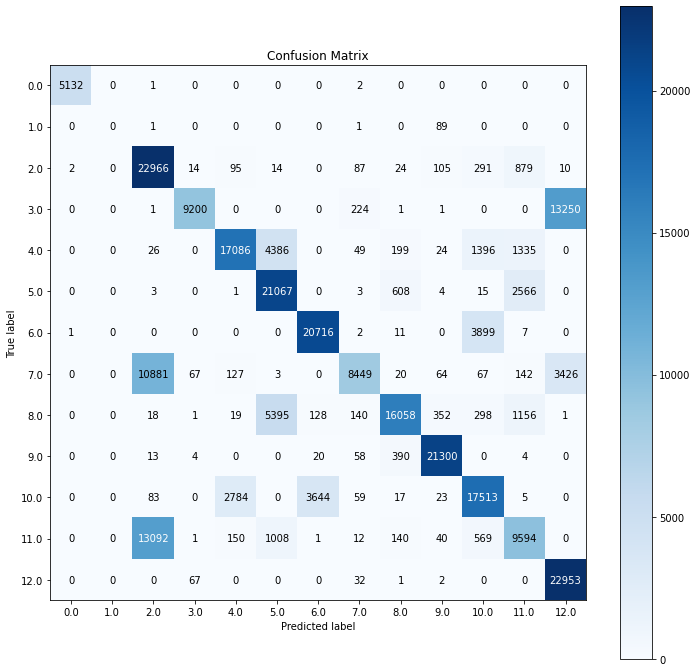

In [88]:

plot_confusion_matrix(y_test, y_pred)

In [89]:
display_metrics('XGBoost ',y_test,y_pred )

XGBoost
Accuracy =  72.14305839923362
Recall = 0.7214305839923362


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report =
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5135
         1.0       0.00      0.00      0.00        91
         2.0       0.49      0.94      0.64     24487
         3.0       0.98      0.41      0.57     22677
         4.0       0.84      0.70      0.76     24501
         5.0       0.66      0.87      0.75     24267
         6.0       0.85      0.84      0.84     24636
         7.0       0.93      0.36      0.52     23246
         8.0       0.92      0.68      0.78     23566
         9.0       0.97      0.98      0.97     21789
        10.0       0.73      0.73      0.73     24128
        11.0       0.61      0.39      0.48     24607
        12.0       0.58      1.00      0.73     23055

    accuracy                           0.72    266185
   macro avg       0.73      0.68      0.68    266185
weighted avg       0.78      0.72      0.71    266185

F1 Score =  0.6758124947274109


Random Forest


In [90]:
from sklearn.ensemble import RandomForestClassifier

# Fitting Random Forest Classification to the Training set
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [91]:
y_pred = model.predict(X_test)

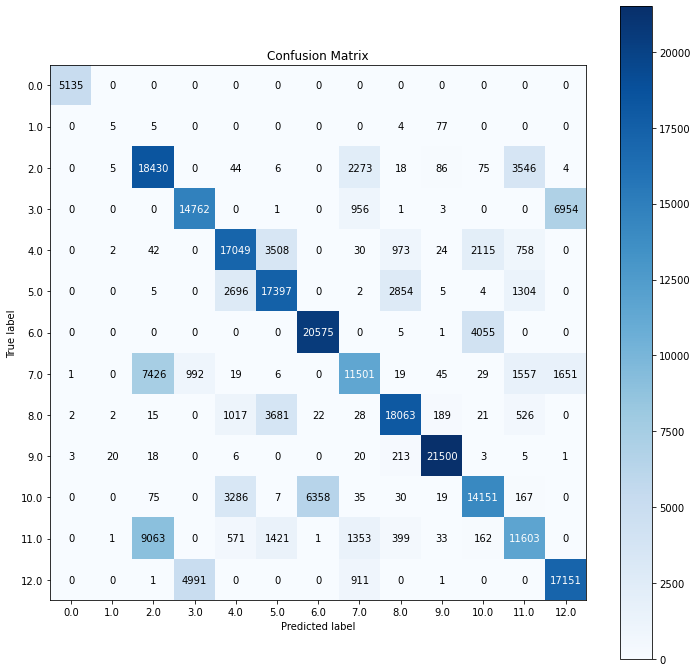

In [92]:

plot_confusion_matrix(y_test, y_pred)

In [93]:
display_metrics('Random Forest',y_test,y_pred )

Random Forest
Accuracy =  70.37286098014539
Recall = 0.7037286098014539
Classification Report =
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5135
         1.0       0.14      0.05      0.08        91
         2.0       0.53      0.75      0.62     24487
         3.0       0.71      0.65      0.68     22677
         4.0       0.69      0.70      0.69     24501
         5.0       0.67      0.72      0.69     24267
         6.0       0.76      0.84      0.80     24636
         7.0       0.67      0.49      0.57     23246
         8.0       0.80      0.77      0.78     23566
         9.0       0.98      0.99      0.98     21789
        10.0       0.69      0.59      0.63     24128
        11.0       0.60      0.47      0.53     24607
        12.0       0.67      0.74      0.70     23055

    accuracy                           0.70    266185
   macro avg       0.68      0.67      0.67    266185
weighted avg       0.71      0.70    

Logistic linear regression


In [94]:
from sklearn import model_selection
from sklearn import linear_model


model= linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
y_pred = model.predict(X_test)



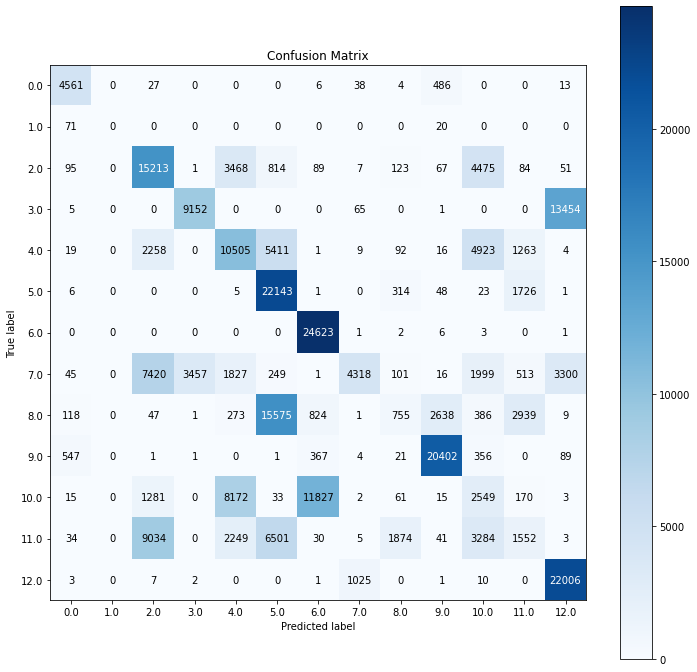

In [101]:
plot_confusion_matrix(y_test, y_pred)

In [102]:
display_metrics('LogisticRegression',y_test,y_pred )


  LogisticRegression
Accuracy =  51.760617615568115
Recall = 0.5176061761556812


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report =
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      5135
         1.0       0.00      0.00      0.00        91
         2.0       0.43      0.62      0.51     24487
         3.0       0.73      0.40      0.52     22677
         4.0       0.40      0.43      0.41     24501
         5.0       0.44      0.91      0.59     24267
         6.0       0.65      1.00      0.79     24636
         7.0       0.79      0.19      0.30     23246
         8.0       0.23      0.03      0.06     23566
         9.0       0.86      0.94      0.90     21789
        10.0       0.14      0.11      0.12     24128
        11.0       0.19      0.06      0.09     24607
        12.0       0.57      0.95      0.71     23055

    accuracy                           0.52    266185
   macro avg       0.48      0.50      0.45    266185
weighted avg       0.49      0.52      0.46    266185

F1 Score =  0.4502789121534934


Decision tree

In [27]:
# Fitting Classifier to the Training Set
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [104]:

# Model performance on training set
y_pred =model.predict(X_test)

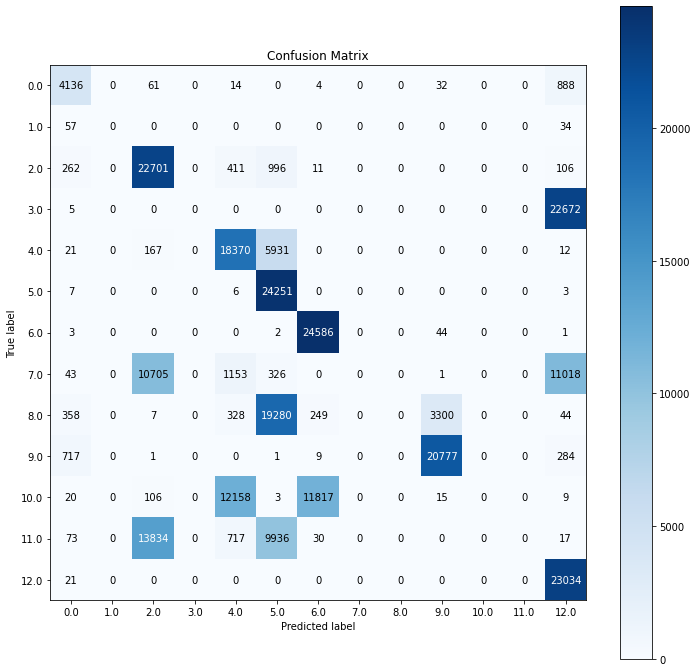

In [105]:
plot_confusion_matrix(y_test, y_pred)

In [106]:
display_metrics('Decision tree',y_test,y_pred )


  LogisticRegression
Accuracy =  51.78916918684374
Recall = 0.5178916918684374


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report =
               precision    recall  f1-score   support

         0.0       0.72      0.81      0.76      5135
         1.0       0.00      0.00      0.00        91
         2.0       0.48      0.93      0.63     24487
         3.0       0.00      0.00      0.00     22677
         4.0       0.55      0.75      0.64     24501
         5.0       0.40      1.00      0.57     24267
         6.0       0.67      1.00      0.80     24636
         7.0       0.00      0.00      0.00     23246
         8.0       0.00      0.00      0.00     23566
         9.0       0.86      0.95      0.90     21789
        10.0       0.00      0.00      0.00     24128
        11.0       0.00      0.00      0.00     24607
        12.0       0.40      1.00      0.57     23055

    accuracy                           0.52    266185
   macro avg       0.31      0.49      0.37    266185
weighted avg       0.31      0.52      0.38    266185

F1 Score =  0.37484282232261606


In [28]:
# Visualize the tree by graphiz
import graphviz
import pydotplus
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn import tree
feature_names =list(normalized_df.columns)
class_names=[str(l) for l in y['Label'].unique()]
dot_data = tree.export_graphviz(model, out_file=None, filled=True, rounded = True, feature_names=feature_names, class_names=class_names)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('original_tree.png')
pydot_graph.set_size('"5,5!"')
pydot_graph.write_png('resized_tree.png')

True

SVM

In [ ]:
from sklearn.svm import SVC
# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:

# make predictions on test set
y_pred=svc.predict(X_test)
plot_confusion_matrix(y_test, y_pred)

In [ ]:
display_metrics('SVM',y_test,y_pred )

Artificial Neural network

In [43]:

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32,input_dim=36, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(13, activation='softmax'))
print('Computing...')

np.random.seed(12345)
#model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics = ["accuracy"])

Computing...


In [44]:
#history = model.fit(X_train,y_train,batch_size=10,epochs=5,verbose=0, validation_split=0.1)


MultiNomial Naive bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train,y_train)

In [ ]:
y_pred = nb.predict(X_test)